## Import Packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", 30)

In [2]:
data = pd.read_csv("./datasets/analysis_data.csv")
data.head()

,id,targeting_score,visual_appeal,contextual_relevance,headline_length,cta_strength,position_on_page,ad_format,age_group,gender,location,time_of_day,day_of_week,brand_familiarity,device_type,ad_frequency,market_saturation,seasonality,headline_sentiment,headline_word_count,headline_power_words,body_text_length,body_word_count,body_sentiment,headline_question,headline_numbers,body_keyword_density,body_readability_score,CTR
0,4316,4.0,1.118593,0.0,73.0,0.0,In-Content,Text,25-34,Male,Midwest,Morning,Tuesday,4.0,Desktop,10,6.0,1,-1.227171,12.0,1.0,105.0,22.0,-1.668241,1.0,1.0,0.075298,61.483619,0.011966
1,7271,3.0,4.890355,0.0,93.0,3.0,Side Banner,Text,25-34,Male,Midwest,Afternoon,Tuesday,2.0,Mobile,6,4.0,0,-0.156878,14.0,1.0,194.0,20.0,3.347280,1.0,0.0,0.097989,54.775205,0.000000
2,6477,3.0,4.744698,1.0,96.0,3.0,In-Content,Text,35-44,Female,South,Morning,Wednesday,14.0,Mobile,8,4.0,1,-1.675919,15.0,1.0,164.0,38.0,-1.015219,1.0,0.0,0.018412,66.367516,0.000000
3,4847,6.0,4.838057,0.0,93.0,5.0,Side Banner,Text,18-24,Female,NaN,Evening,Thursday,5.0,Mobile,10,4.0,0,-2.515967,6.0,0.0,61.0,37.0,0.066430,1.0,0.0,0.068744,66.084536,0.000681
4,4566,3.0,1.358385,0.0,79.0,3.0,Side Banner,Text,18-24,Female,South,Afternoon,Friday,15.0,Mobile,8,9.0,1,1.405051,12.0,0.0,191.0,1.0,-0.996762,1.0,0.0,0.043858,89.647942,0.005134


## Exploratory Data Analysis

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'targeting_score'}>,
        <Axes: title={'center': 'visual_appeal'}>,
        <Axes: title={'center': 'contextual_relevance'}>,
        <Axes: title={'center': 'headline_length'}>],
       [<Axes: title={'center': 'cta_strength'}>,
        <Axes: title={'center': 'brand_familiarity'}>,
        <Axes: title={'center': 'ad_frequency'}>,
        <Axes: title={'center': 'market_saturation'}>,
        <Axes: title={'center': 'seasonality'}>],
       [<Axes: title={'center': 'headline_sentiment'}>,
        <Axes: title={'center': 'headline_word_count'}>,
        <Axes: title={'center': 'headline_power_words'}>,
        <Axes: title={'center': 'body_text_length'}>,
        <Axes: title={'center': 'body_word_count'}>],
       [<Axes: title={'center': 'body_sentiment'}>,
        <Axes: title={'center': 'headline_question'}>,
        <Axes: title={'center': 'headline_numbers'}>,
        <Axes: title={'center': 'body_keywor

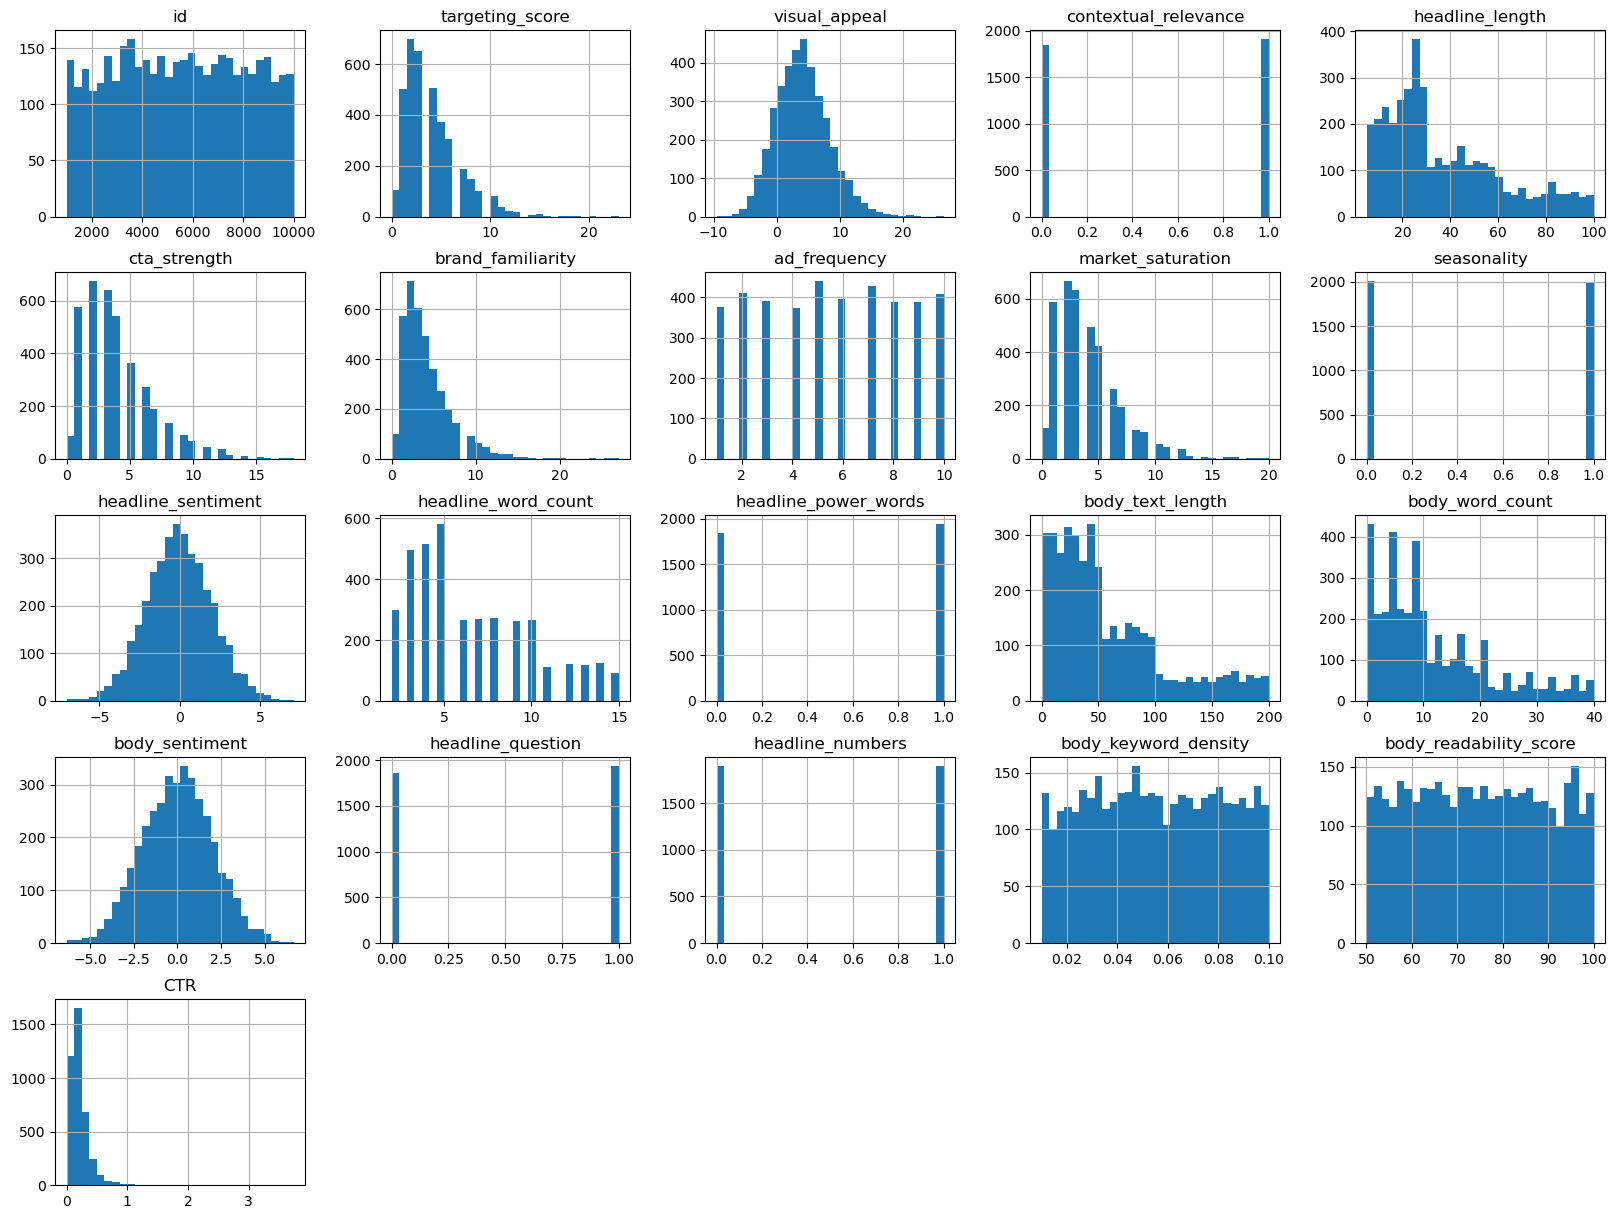

In [3]:
data.hist(bins=30, figsize=(20,15))

<Axes: >

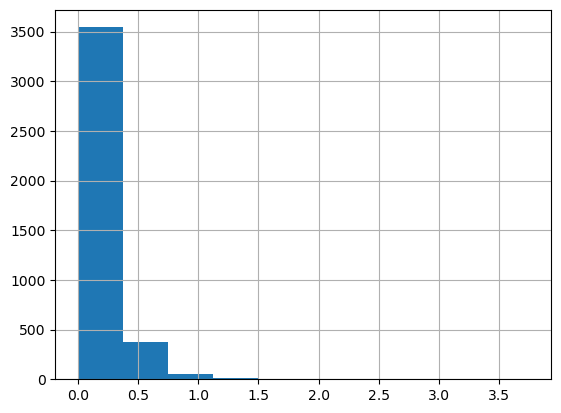

In [4]:
data["CTR"].hist()

In [5]:
data["CTR_bin"] = pd.cut(data["CTR"], bins=[-np.inf,0., 0.25, 0.5, 1., 2., np.inf], labels=[1,2,3,4,5,6])

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, random_state=123, test_size=0.2)
for train_index, test_index in split.split(data, data["CTR_bin"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

train_set["CTR_bin"].value_counts()/len(train_set)

CTR_bin
2    0.650000
3    0.231875
1    0.064687
4    0.044062
5    0.007500
6    0.001875
Name: count, dtype: float64

In [7]:
for set_ in (train_set, test_set):
    set_.drop("CTR_bin", axis=1, inplace=True)

<Axes: xlabel='visual_appeal', ylabel='CTR'>

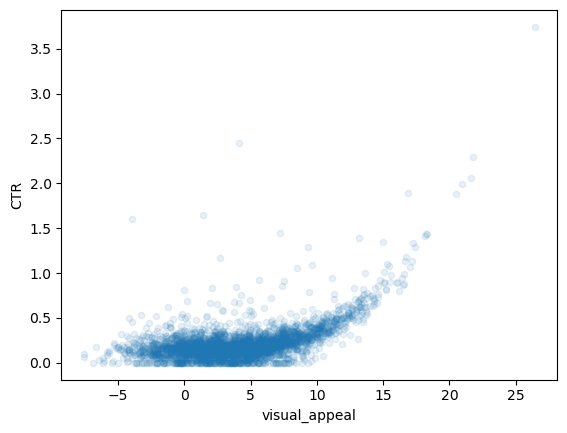

In [8]:
train_set.plot(kind="scatter", x="visual_appeal", y="CTR", alpha=0.1)

<Axes: xlabel='targeting_score', ylabel='CTR'>

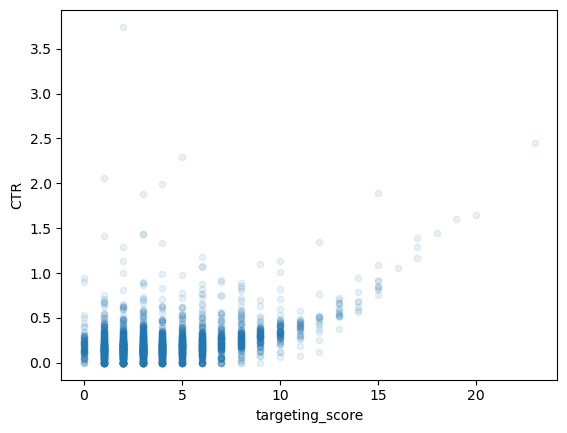

In [9]:
train_set.plot(kind="scatter", x="targeting_score", y="CTR", alpha=0.1)

In [10]:
corr_matrix = train_set.select_dtypes(include="number").corr()
corr_matrix["CTR"].sort_values(ascending=False)

CTR                       1.000000
visual_appeal             0.536206
targeting_score           0.370592
cta_strength              0.117712
contextual_relevance      0.041838
body_sentiment            0.010508
body_keyword_density      0.007310
headline_numbers          0.004564
seasonality               0.003866
ad_frequency              0.001262
headline_power_words     -0.004933
body_readability_score   -0.005426
brand_familiarity        -0.006280
id                       -0.007248
headline_question        -0.009422
market_saturation        -0.009466
headline_sentiment       -0.036942
headline_word_count      -0.061960
body_text_length         -0.063917
body_word_count          -0.074108
headline_length          -0.145907
Name: CTR, dtype: float64

array([[<Axes: xlabel='CTR', ylabel='CTR'>,
        <Axes: xlabel='visual_appeal', ylabel='CTR'>,
        <Axes: xlabel='targeting_score', ylabel='CTR'>,
        <Axes: xlabel='cta_strength', ylabel='CTR'>,
        <Axes: xlabel='headline_length', ylabel='CTR'>],
       [<Axes: xlabel='CTR', ylabel='visual_appeal'>,
        <Axes: xlabel='visual_appeal', ylabel='visual_appeal'>,
        <Axes: xlabel='targeting_score', ylabel='visual_appeal'>,
        <Axes: xlabel='cta_strength', ylabel='visual_appeal'>,
        <Axes: xlabel='headline_length', ylabel='visual_appeal'>],
       [<Axes: xlabel='CTR', ylabel='targeting_score'>,
        <Axes: xlabel='visual_appeal', ylabel='targeting_score'>,
        <Axes: xlabel='targeting_score', ylabel='targeting_score'>,
        <Axes: xlabel='cta_strength', ylabel='targeting_score'>,
        <Axes: xlabel='headline_length', ylabel='targeting_score'>],
       [<Axes: xlabel='CTR', ylabel='cta_strength'>,
        <Axes: xlabel='visual_appeal', ylabel

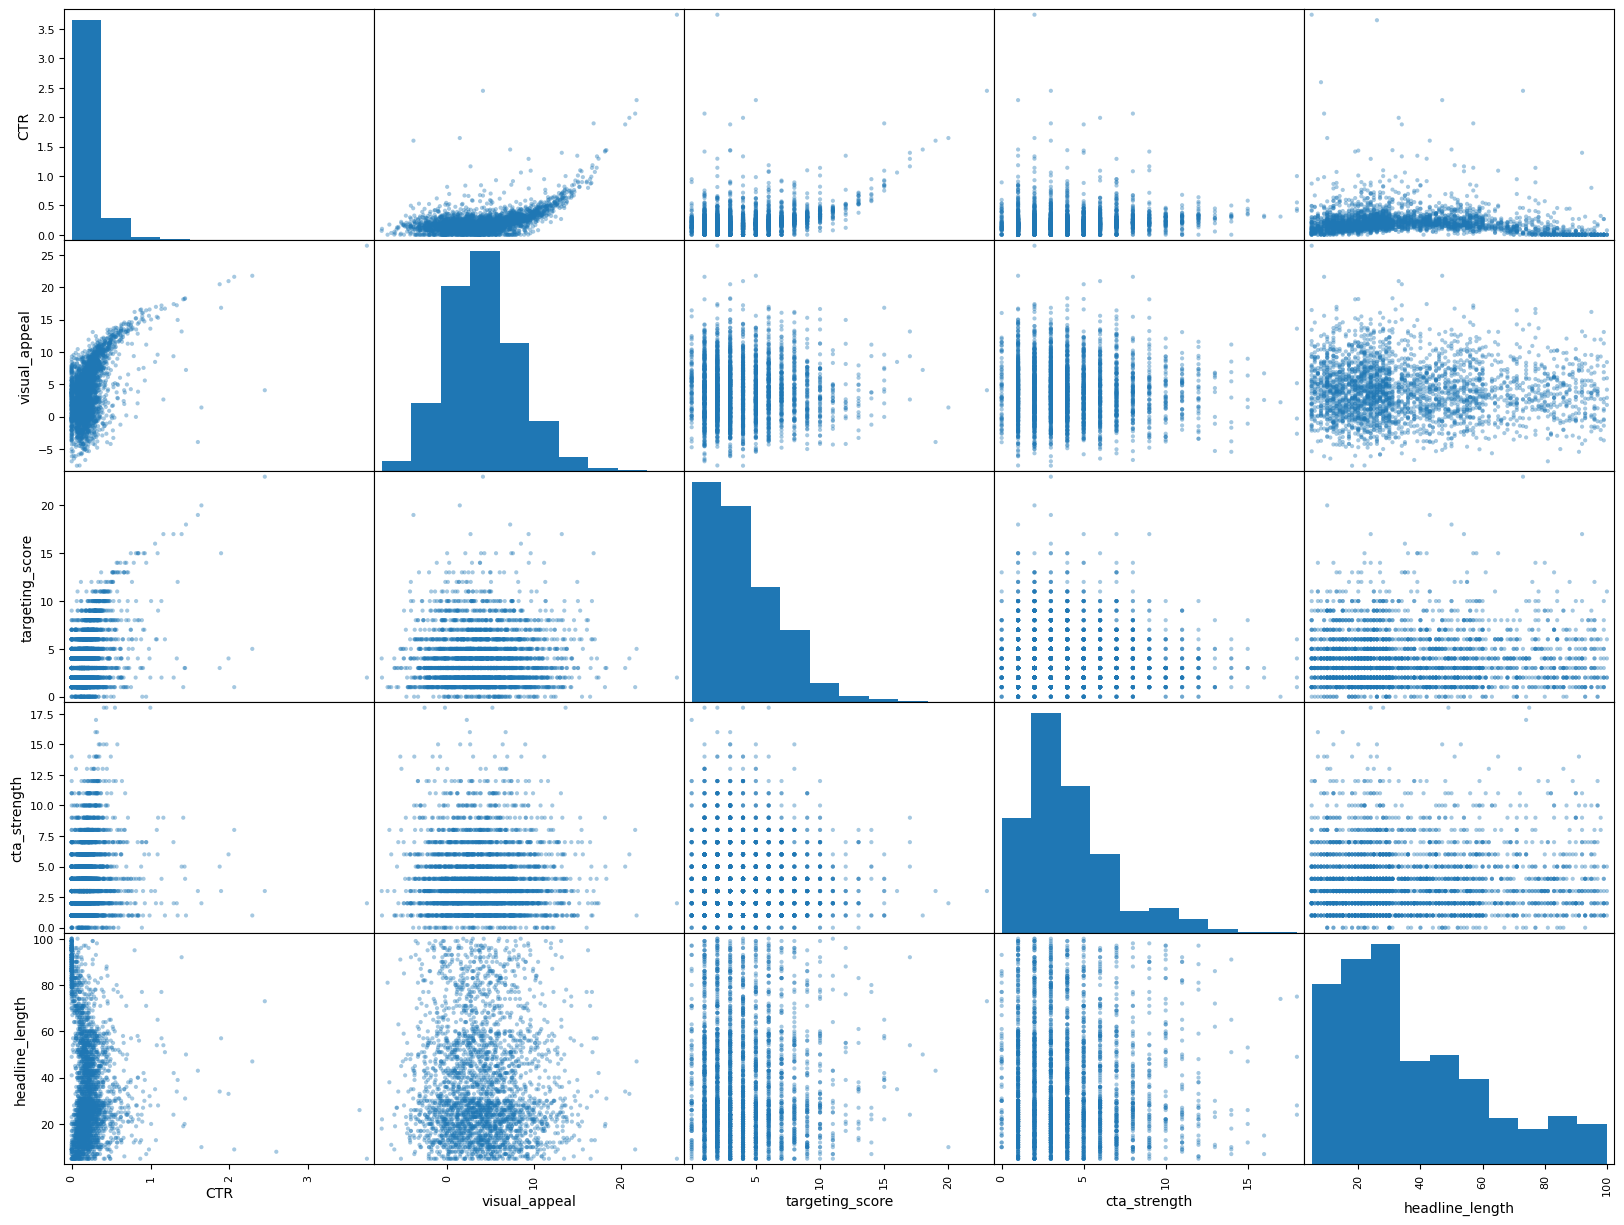

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["CTR", "visual_appeal", "targeting_score", "cta_strength", "headline_length"]
scatter_matrix(train_set[attributes], figsize=(20,15), alpha=0.4)

In [12]:
train_set.describe()

,id,targeting_score,visual_appeal,contextual_relevance,headline_length,cta_strength,brand_familiarity,ad_frequency,market_saturation,seasonality,headline_sentiment,headline_word_count,headline_power_words,body_text_length,body_word_count,body_sentiment,headline_question,headline_numbers,body_keyword_density,body_readability_score,CTR
count,3200.000000,3012.000000,3012.000000,3012.000000,3034.000000,3012.000000,3012.000000,3200.000000,3012.000000,3200.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3200.000000
mean,5529.201875,4.007636,4.010422,0.507636,36.862558,3.930943,4.021912,5.550313,3.912019,0.494375,-0.043098,6.597891,0.516150,57.874753,11.423204,0.049900,0.512195,0.500000,0.055411,74.888130,0.215707
std,2552.970055,2.793028,4.181249,0.500025,23.905681,2.775901,2.977417,2.852523,2.768716,0.500046,2.026165,3.539771,0.499821,49.401390,9.940519,1.985861,0.499934,0.500082,0.025616,14.351319,0.214514
min,1002.000000,0.000000,-7.586357,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-7.036277,2.000000,0.000000,0.000000,0.000000,-6.353292,0.000000,0.000000,0.010085,50.049375,0.000000
25%,3377.750000,2.000000,1.087697,0.000000,19.000000,2.000000,2.000000,3.000000,2.000000,0.000000,-1.404556,4.000000,0.000000,21.000000,4.000000,-1.322961,0.000000,0.000000,0.033481,62.480625,0.107574
50%,5539.500000,3.000000,3.809028,1.000000,29.000000,3.000000,3.000000,6.000000,3.000000,0.000000,-0.102928,5.000000,1.000000,43.000000,8.500000,0.092428,1.000000,0.500000,0.054884,74.793637,0.180030
75%,7699.750000,5.000000,6.598385,1.000000,51.000000,5.000000,5.000000,8.000000,5.000000,1.000000,1.325269,9.000000,1.000000,82.000000,17.000000,1.427475,1.000000,1.000000,0.077608,87.037535,0.266630
max,9999.000000,23.000000,26.445835,1.000000,100.000000,18.000000,26.000000,10.000000,20.000000,1.000000,7.109872,15.000000,1.000000,200.000000,40.000000,6.681744,1.000000,1.000000,0.099998,99.997092,3.745027


In [13]:
train_set.isnull().sum()

id                          0
targeting_score           188
visual_appeal             188
contextual_relevance      188
headline_length           166
cta_strength              188
position_on_page            0
ad_format                   0
age_group                  96
gender                     62
location                  237
time_of_day                 0
day_of_week                 0
brand_familiarity         188
device_type                 0
ad_frequency                0
market_saturation         188
seasonality                 0
headline_sentiment        166
headline_word_count       166
headline_power_words      166
body_text_length          166
body_word_count           166
body_sentiment            166
headline_question         166
headline_numbers          166
body_keyword_density      166
body_readability_score    166
CTR                         0
dtype: int64

## Data Preparation

In [14]:
from sklearn.impute import KNNImputer, SimpleImputer

knn_imputer = KNNImputer(n_neighbors=3)
train_set_num = train_set.select_dtypes(include="number")
imputed_data = knn_imputer.fit_transform(train_set_num)

train_set_num_imputed = pd.DataFrame(imputed_data, columns=train_set_num.columns)

imputer = SimpleImputer(strategy="most_frequent")
train_set_obj = train_set.select_dtypes(include="object")
imputed_data = imputer.fit_transform(train_set_obj)

train_set_obj_imputed = pd.DataFrame(imputed_data, columns=train_set_obj.columns)

In [15]:
train_set_num_imputed.columns

Index(['id', 'targeting_score', 'visual_appeal', 'contextual_relevance',
       'headline_length', 'cta_strength', 'brand_familiarity', 'ad_frequency',
       'market_saturation', 'seasonality', 'headline_sentiment',
       'headline_word_count', 'headline_power_words', 'body_text_length',
       'body_word_count', 'body_sentiment', 'headline_question',
       'headline_numbers', 'body_keyword_density', 'body_readability_score',
       'CTR'],
      dtype='object')

In [16]:
train_set_obj_imputed.columns

Index(['position_on_page', 'ad_format', 'age_group', 'gender', 'location',
       'time_of_day', 'day_of_week', 'device_type'],
      dtype='object')

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder, FunctionTransformer

def group_categories(series, threshold=0.05):
    value_counts = series.value_counts(normalize=True)
    return series.apply(lambda x: x if value_counts[x] >= threshold else 'Other')
group_categories_transformer = FunctionTransformer(
    func=lambda X: group_categories(X, threshold=0.05)
)

cat_attribs = ['position_on_page', 'ad_format', 'age_group', 'gender', 'location',
       'time_of_day', 'day_of_week', 'device_type']

num_attribs = ['targeting_score', 'visual_appeal', 'contextual_relevance',
       'headline_length', 'cta_strength', 'brand_familiarity', 'ad_frequency',
       'market_saturation', 'seasonality', 'headline_sentiment',
       'headline_word_count', 'headline_power_words', 'body_text_length',
       'body_word_count', 'body_sentiment', 'headline_question',
       'headline_numbers', 'body_keyword_density', 'body_readability_score']

cat_pipeline = ColumnTransformer([
    ('imputer', SimpleImputer(strategy="most_frequent"), cat_attribs),
    #('group_categories', group_categories_transformer, cat_attribs),
    ('encoder',OneHotEncoder(), cat_attribs)
], remainder="passthrough")

num_pipeline = ColumnTransformer([
    ('knn_impute', KNNImputer(n_neighbors=3), num_attribs),
    ('normalizer', Normalizer(), num_attribs)
], remainder="passthrough")

full_pipeline = Pipeline(steps=[
        #("cat", cat_pipeline),
        ("num", num_pipeline)
    ])

In [18]:
num_pipeline = Pipeline([
    ('knn_impute', KNNImputer(n_neighbors=3)),
    ('normalize', Normalizer())
])

cat_pipeline = Pipeline([
    ('mode_impute', SimpleImputer(strategy="most_frequent")),
    ('encode', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
], remainder="passthrough")

In [19]:
ctr_data = train_set.drop(["id","CTR"], axis=1)
ctr_labels = train_set["CTR"].copy()

In [20]:
ctr_data_prepared = full_pipeline.fit_transform(ctr_data)
ctr_data_prepared

array([[0.06265114, 0.07978253, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.041057  , 0.00665099, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.1044224 , 0.00570523, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.07203014, 0.0385742 , 0.01440603, ..., 0.        , 1.        ,
        0.        ],
       [0.03203097, 0.03710518, 0.01067699, ..., 1.        , 0.        ,
        0.        ],
       [0.03425531, 0.03580344, 0.        , ..., 0.        , 1.        ,
        0.        ]])

## Modeling

### Baseline Performance

In [21]:
ctr_mean = np.mean(ctr_labels)
np.sqrt(np.mean((ctr_labels - ctr_mean) ** 2))

0.21448054437239708

### Linear Regression

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
score = cross_val_score(lin_reg, ctr_data_prepared, ctr_labels, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)
lin_rmse = np.sqrt(-score)
lin_rmse.mean()

0.17795322360616936

### Decision tree

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
score = cross_val_score(tree_reg, ctr_data_prepared, ctr_labels, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)
tree_rmse = np.sqrt(-score)
tree_rmse.mean()

0.20351650310797634

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
score = cross_val_score(rf_reg, ctr_data_prepared, ctr_labels, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)
rf_rmse = np.sqrt(-score)
rf_rmse.mean()

0.13448401638897503

### Gradient Boost

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()
score = cross_val_score(gb_reg, ctr_data_prepared, ctr_labels, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)
gb_rmse = np.sqrt(-score)
gb_rmse.mean()

0.13294650797786847

### Hyper-Parameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {
    'n_estimators' : [50, 100, 200],
    'learning_rate' : [0.01, 0.05, 0.1],
    'max_depth' : [3, 5, 7]
}

xgb_gridsearch = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)
xgb_gridsearch.fit(ctr_data_prepared, ctr_labels)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [32]:
print(f"Best Parameters: {xgb_gridsearch.best_params_}")
print(f"Best Accuracy: {np.sqrt(-xgb_gridsearch.best_score_)}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Accuracy: 0.1364294396361032
